In [9]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
fuel_eco = pd.read_csv("fuel-econ.csv")
fuel_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [15]:
fuel_eco.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [51]:
fuel_eco['id'] = fuel_eco['id'].astype('string')

In [53]:
numeric_fuel_eco=fuel_eco.select_dtypes(include='number')
numeric_fuel_eco

,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,2013,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,2013,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,2013,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,2013,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,2013,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,2018,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,2018,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,2018,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,2018,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


In [55]:
numeric_fuel_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       3929 non-null   int64  
 1   cylinders  3929 non-null   int64  
 2   displ      3929 non-null   float64
 3   pv2        3929 non-null   int64  
 4   pv4        3929 non-null   int64  
 5   city       3929 non-null   float64
 6   UCity      3929 non-null   float64
 7   highway    3929 non-null   float64
 8   UHighway   3929 non-null   float64
 9   comb       3929 non-null   float64
 10  co2        3929 non-null   int64  
 11  feScore    3929 non-null   int64  
 12  ghgScore   3929 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 399.2 KB


# Visualizations


Side note my primry goal in this visuals is to get some Insights  about the factors affect CO2 emissions and Recomendations about how to reduce CO2 emissions

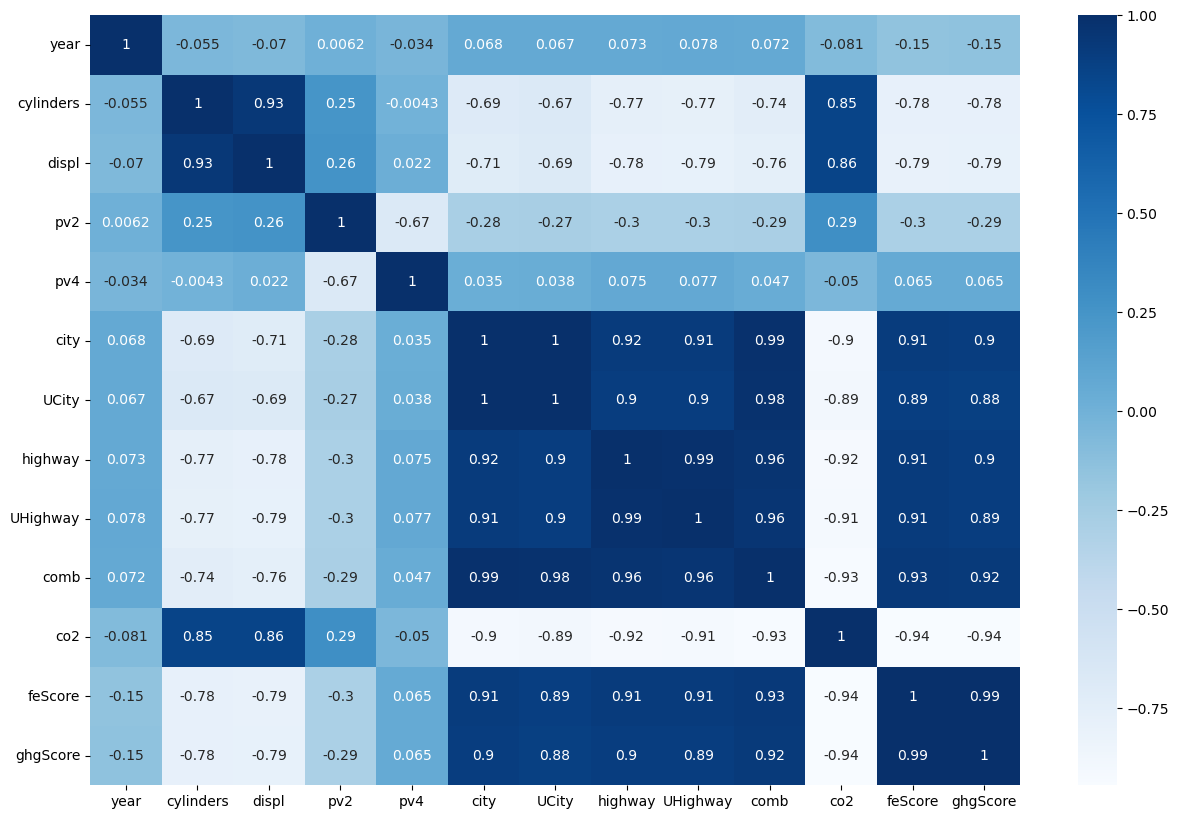

In [226]:
correlation = numeric_fuel_eco.corr()
plt.figure(figsize=(15, 10))  
sb.heatmap(correlation, cmap="Blues", annot=True)
plt.show()

Here we can see alot of insights 

Key Observations:
CO2 and Cylinders/Displacement:

Cylinders (0.85) and Displacement (0.86) have strong positive correlations with CO2 emissions.  that meansvehicles with more cylinders or higher engine displacement tend to produce more CO2 emissions.

CO2 and Fuel Efficiency (City, Highway, Combined):

City (-0.90), Highway (-0.92), and Combined (-0.93) fuel efficiencies all have strong negative correlations with CO2 emissions. This shows that better fuel efficiency is associated with lower CO2 emissions.

CO2 and ghgScore:

The ghgScore (-0.94) also shows a strong negative correlation with CO2 emissions, indicating that a higher ghgScore (which suggests a more environmentally friendly vehicle) corresponds with lower CO2 emissions.

CO2 and (feScore):

Similarly, thefeScore (-0.94) has a strong negative correlation with CO2 emissions, reflecting that vehicles with better feScore produce less CO2.

CO2 and Year:

The correlation between Year (-0.081) and CO2 emissions is weakly negative, suggesting a slight trend toward lower CO2 emissions in newer vehicles.


Insights to reduce CO2:
Engine Size Matters: Vehicles with larger engines (more cylinders and higher displacement) tend to have higher CO2 emissions.
Fuel Efficiency: The strong negative correlation between CO2 emissions and  fuel efficiency the corelation matrics highlights the importance of improving fuel economy to reduce emissions.
Score Metrics are Reliable: ghgScore and feScore are reliable indicators of CO2 emissions, as shown by their strong negative correlations.

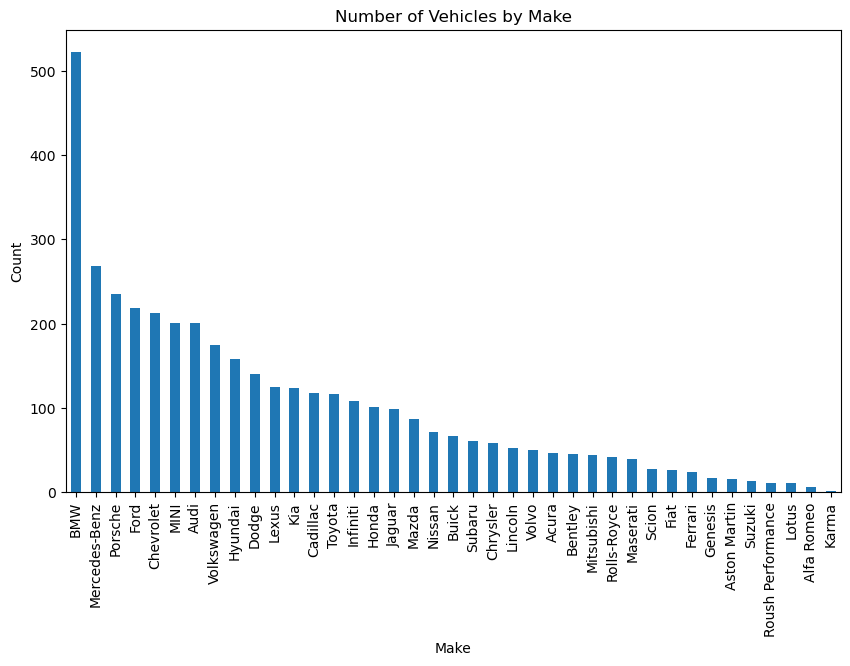

In [195]:
fuel_eco["make"].value_counts().plot(kind = "bar",figsize=(10, 6))
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Number of Vehicles by Make')
ax.set_xticklabels(gp.index, rotation=45, ha='right')

plt.show()

The BMW cars are the most contributed in this report 

42

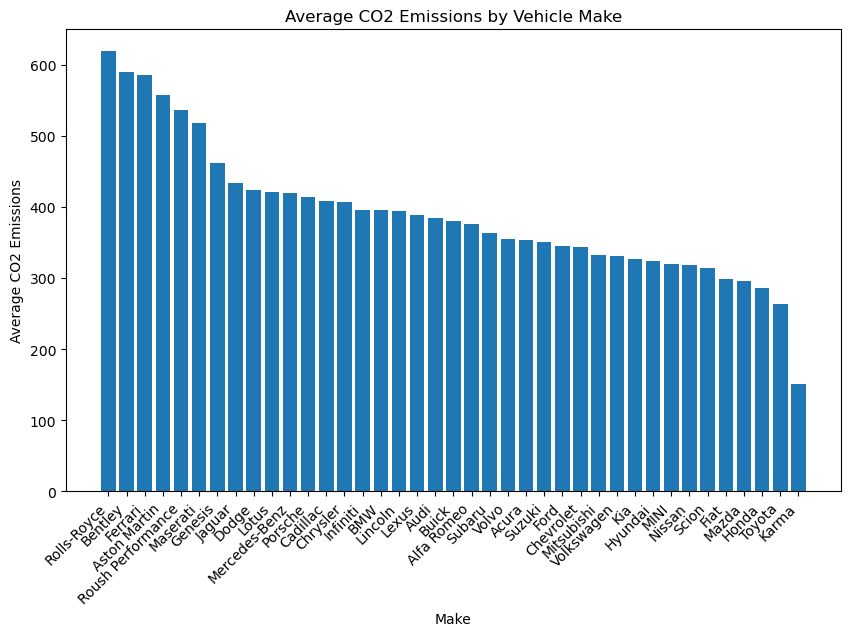

In [189]:
fig , ax = plt.subplots(figsize=(10, 6))
gp=fuel_eco.groupby("make")["co2"].mean().sort_values(ascending = False)
ax.bar(gp.index,gp.values)
ax.set_xlabel('Make')
ax.set_ylabel('Average CO2 Emissions')
ax.set_title('Average CO2 Emissions by Vehicle Make')
ax.set_xticklabels(gp.index, rotation=45, ha='right')
plt.show()

The Rolls Royce cars has the largest CO2 emissions


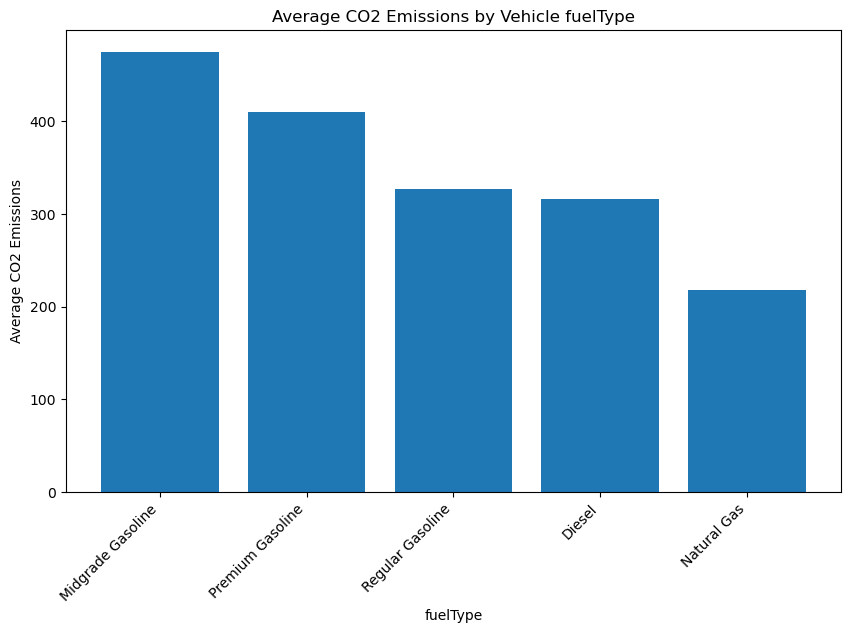

In [256]:
fig , ax = plt.subplots(figsize=(10, 6))
gp=fuel_eco.groupby("fuelType")["co2"].mean().sort_values(ascending = False)
ax.bar(gp.index,gp.values)
ax.set_xlabel('fuelType')
ax.set_ylabel('Average CO2 Emissions')
ax.set_title('Average CO2 Emissions by Vehicle fuelType')
ax.set_xticklabels(gp.index, rotation=45, ha='right')
plt.show()

As we see the CO2 emissions vary significantly across different fuel types. Vehicles using Midgrade Gasoline have the highest average CO2 emissions followed closely by those using Premium Gasoline and Regular Gasoline. On the other hand, Diesel vehicles show lower average CO2 emissions compared to gasoline types and Natural Gas vehicles have the lowest CO2 emissions among the categories. This highlights the impact of fuel type on a vehicle's carbon footprint with natural gas being the most eco-friendly option in this context 

In [262]:
fuel_eco["fuelType"].value_counts()

fuelType
Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: count, dtype: int64

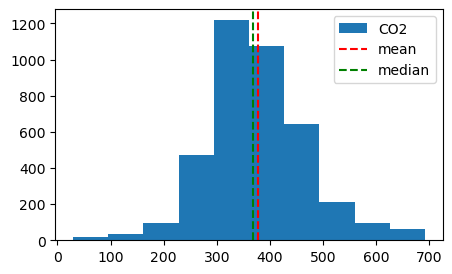

In [246]:
mean = np.mean(fuel_eco['co2'])
mean = fuel_eco['co2'].mean()
median = np.median(fuel_eco['co2'])

plt.figure(figsize=(5, 3))
plt.hist(fuel_eco['co2'], label='CO2')

plt.axvline(x=mean, color='r', linestyle='--', label='mean')
plt.axvline(x=median, color='g', linestyle='--', label='median')

plt.legend()
plt.show()

as we can see the CO2 is nornmaly distribtes around the value 376.564

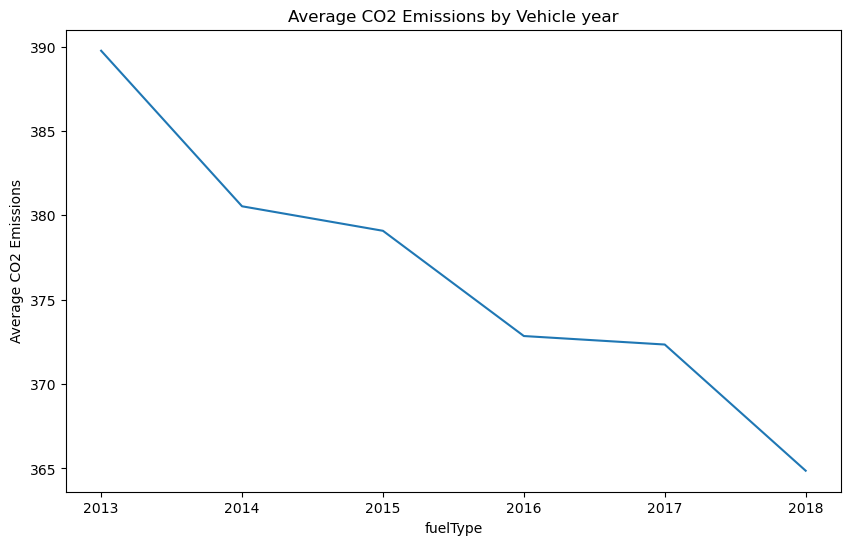

In [296]:
fig , ax = plt.subplots(figsize=(10, 6))
gp=fuel_eco.groupby("year")["co2"].mean().sort_index(ascending = True)
ax.plot(gp.index,gp.values)
ax.set_xlabel('fuelType')
ax.set_ylabel('Average CO2 Emissions')
ax.set_title('Average CO2 Emissions by Vehicle year')
plt.show()

Despite the slight negative correlation between CO2 emissions and vehicle model year this trend underscores the increasing efficiency of cars over time. As newer models are introduced advancements in technology and stricter environmental regulations have led to reduced CO2 emissions leed to a positive shift toward more eco-friendly vehicles. 

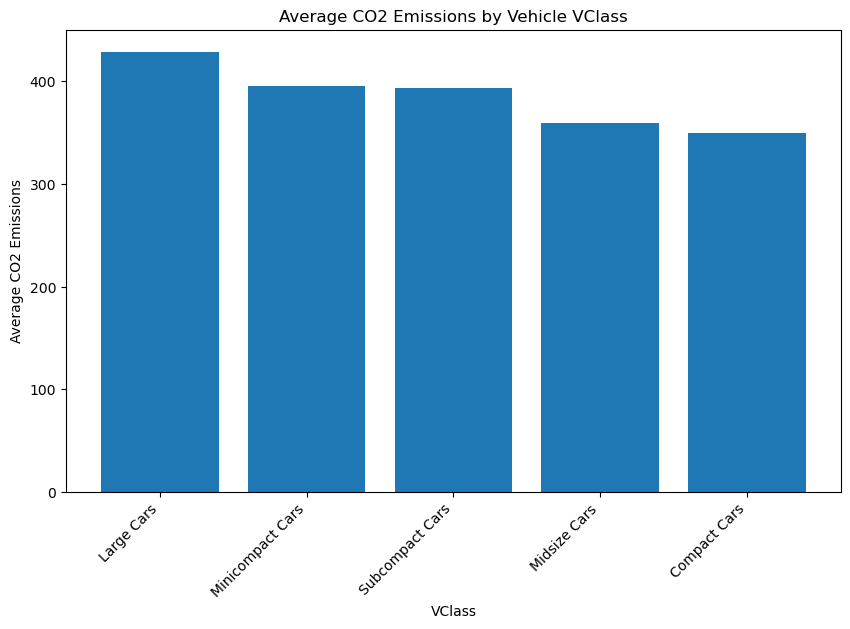

In [299]:
fig , ax = plt.subplots(figsize=(10, 6))
gp=fuel_eco.groupby("VClass")["co2"].mean().sort_values(ascending = False)
ax.bar(gp.index,gp.values)
ax.set_xlabel('VClass')
ax.set_ylabel('Average CO2 Emissions')
ax.set_title('Average CO2 Emissions by Vehicle VClass')
ax.set_xticklabels(gp.index, rotation=45, ha='right')
plt.show()

This graph illustrates the relationship between vehicle class (VClass) and average CO2 emissions. As expected, Large Cars exhibit the highest average CO2 emissions, reflecting their greater size and engine power. Conversely, Compact Cars and Midsize Cars produce lower CO2 emissions, indicating better fuel efficiency relative to their size. The data clearly demonstrates that vehicle size is directly correlated with CO2 emissions with larger vehicles contributing more to overall emissions which make sense

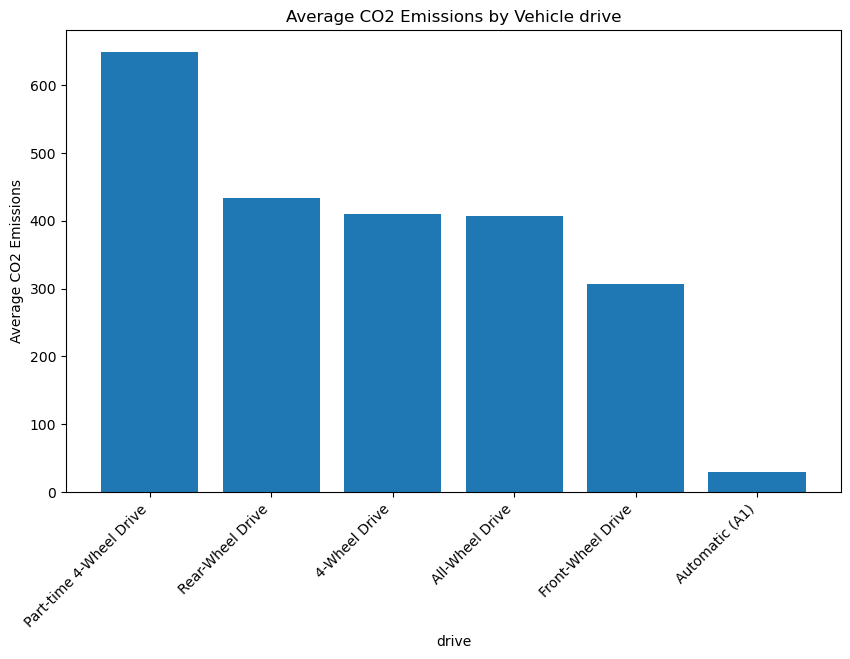

In [301]:
fig , ax = plt.subplots(figsize=(10, 6))
gp=fuel_eco.groupby("drive")["co2"].mean().sort_values(ascending = False)
ax.bar(gp.index,gp.values)
ax.set_xlabel('drive')
ax.set_ylabel('Average CO2 Emissions')
ax.set_title('Average CO2 Emissions by Vehicle drive')
ax.set_xticklabels(gp.index, rotation=45, ha='right')
plt.show()

This graph demonstrates the relationship between different drive types and average CO2 emissions. Part-time 4-Wheel Drive vehicles exhibit the highest average CO2 emissions, followed by Rear-Wheel Drive and 4-Wheel Drive vehicles. In contrast, vehicles with Automatic (A1) drive have significantly lower emissions, indicating higher fuel efficiency. This suggests that drive type plays a significant role in CO2 emissions, with four-wheel and rear-wheel drive systems typically resulting in higher emissions compared to other drive configurations.

# Final Recommendations

* Promote the Adoption of Cleaner Fuels by Encourage the use of natural gas or alternative fuels with lower CO2 emissions Policies and incentives could be implemented to make cleaner fuels more accessible and affordable.

* Produce Smaller and More Efficient Vehicles: Governments and manufacturers should promote the design and purchase of smaller more efficient vehicles. 
* Enhance Vehicle Efficiency Standards: more strict regulations and laws on CO2 emissions for new vehicles particularly in larger cars classes and less efficient drive types could lead to innovation and lead to more environmentally friendly options.

* Support the Transition to Efficient Drive Systems encourage the adoption of drive systems that are proven to be more fuel-efficient, such as front-wheel drive or automatic systems.
* Continuous Improvement in Vehicle Technology: The automotive industry should continue to innovate and improve vehicle technology to further reduce CO2 emissions.Investments in research and development for more efficient engines lightweight materials can contribute to this goal.
* Public Awareness and Education: Educate consumers about the environmental impact of their vehicle choices. Awareness campaigns can help make consumer tend to buy more sustainable cars.

